## Data Analytics
### Lab 2.
Alicja Bogusz

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
F = len("Alicja")
L = len("Bogusz")
print(F, L)

6 6


### Excercise 1 - Generated Quantities Block

In [4]:
gen_quant = CmdStanModel(stan_file='/root/stan_files/code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,186.7130,167.0,191.0,188.0,183.0,184.0,199.0
1,0.0,0.0,236.6770,237.0,240.0,248.0,256.0,243.0,243.0
2,0.0,0.0,95.1599,96.0,90.0,94.0,90.0,81.0,103.0
3,0.0,0.0,183.4700,180.0,169.0,179.0,197.0,217.0,171.0
4,0.0,0.0,60.6284,61.0,54.0,45.0,59.0,70.0,53.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,29.0537,25.0,30.0,26.0,34.0,39.0,26.0
996,0.0,0.0,140.7280,137.0,141.0,147.0,157.0,118.0,163.0
997,0.0,0.0,166.8350,175.0,173.0,180.0,154.0,171.0,178.0
998,0.0,0.0,125.0090,127.0,112.0,133.0,124.0,133.0,112.0


In [7]:
df_y_sim = df.drop(df.columns[0:3], axis=1)
df_y_sim

,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,167.0,191.0,188.0,183.0,184.0,199.0
1,237.0,240.0,248.0,256.0,243.0,243.0
2,96.0,90.0,94.0,90.0,81.0,103.0
3,180.0,169.0,179.0,197.0,217.0,171.0
4,61.0,54.0,45.0,59.0,70.0,53.0
...,...,...,...,...,...,...
995,25.0,30.0,26.0,34.0,39.0,26.0
996,137.0,141.0,147.0,157.0,118.0,163.0
997,175.0,173.0,180.0,154.0,171.0,178.0
998,127.0,112.0,133.0,124.0,133.0,112.0


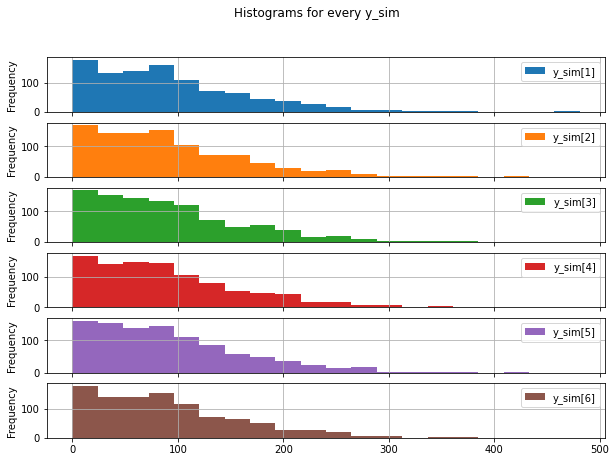

In [8]:
df_y_sim.plot.hist(subplots=True, bins=20, figsize=(10,7), grid=True, title="Histograms for every y_sim")
plt.show()

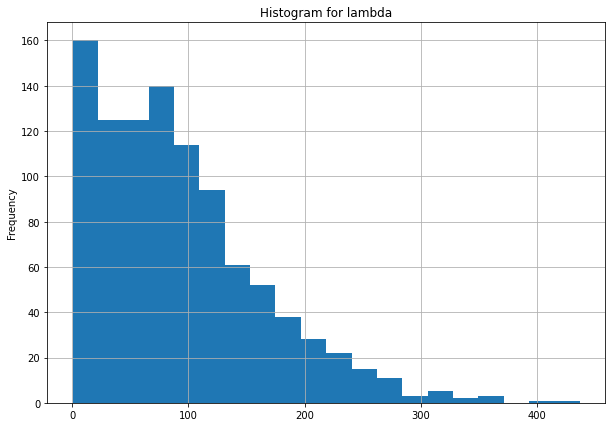

In [9]:
df['lambda'].plot.hist(bins=20, figsize=(10,7), grid=True, title="Histogram for lambda")
plt.show()

### Excercise 2 - Constrains on the data

In [10]:
bern1 = CmdStanModel(stan_file='/root/stan_files/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [11]:
bern2 = CmdStanModel(stan_file='/root/stan_files/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


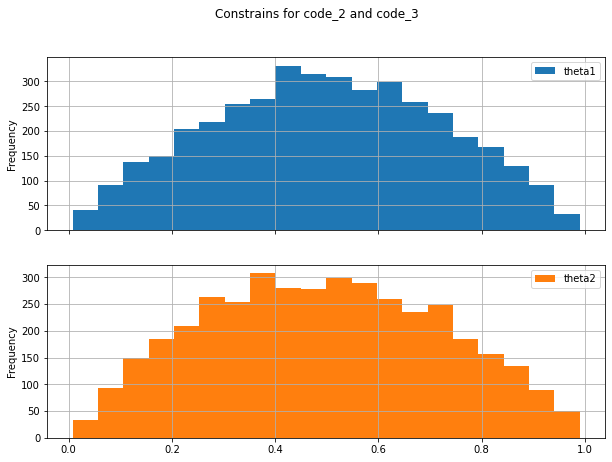

In [12]:
theta1 = samp_bern1.stan_variable('theta')
theta2 = samp_bern2.stan_variable('theta')

df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True, bins=20, figsize=(10,7), grid=True, title='Constrains for code_2 and code_3')
plt.show()

### Excercise 3 - Constrains on parameters

Unctonstrained parameters

In [13]:
model_gm1 = CmdStanModel(stan_file='/root/stan_files/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file /root/stan_files/code_4.stan to exe file /root/stan_files/code_4
INFO:cmdstanpy:compiled model executable: /root/stan_files/code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |█████     | 00:00 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |████████▍ | 00:00 Iteration: 5800 / 7000 [ 82%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20230320222326_1.csv, /samples/code_4-20230320222326_2.csv, /samples/code_4-20230320222326_3.csv, /samples/code_4-20230320222326_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

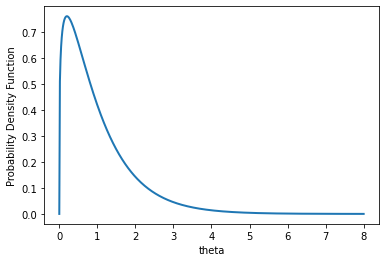

In [14]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Constrained parameters

In [15]:
model_gm2 = CmdStanModel(stan_file='/root/stan_files/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |█████     | 00:00 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20230320222328_1.csv, /samples/code_5-20230320222328_2.csv, /samples/code_5-20230320222328_3.csv, /samples/code_5-20230320222328_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

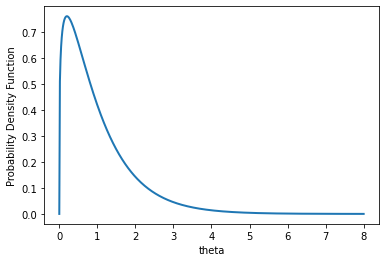

In [16]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

### Excercise 4 - Selection of parameters using equasion solving

In [20]:
model_tune = CmdStanModel(stan_file='/root/stan_files/code_6.stan')

y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


### Excercise 5 - Different methods of definign models

In [24]:
model_samp_st = CmdStanModel(stan_file='/root/stan_files/code_7.stan')
model_log_target = CmdStanModel(stan_file='/root/stan_files/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='/root/stan_files/code_9.stan')
data = {'N': F}
seed = 14102000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


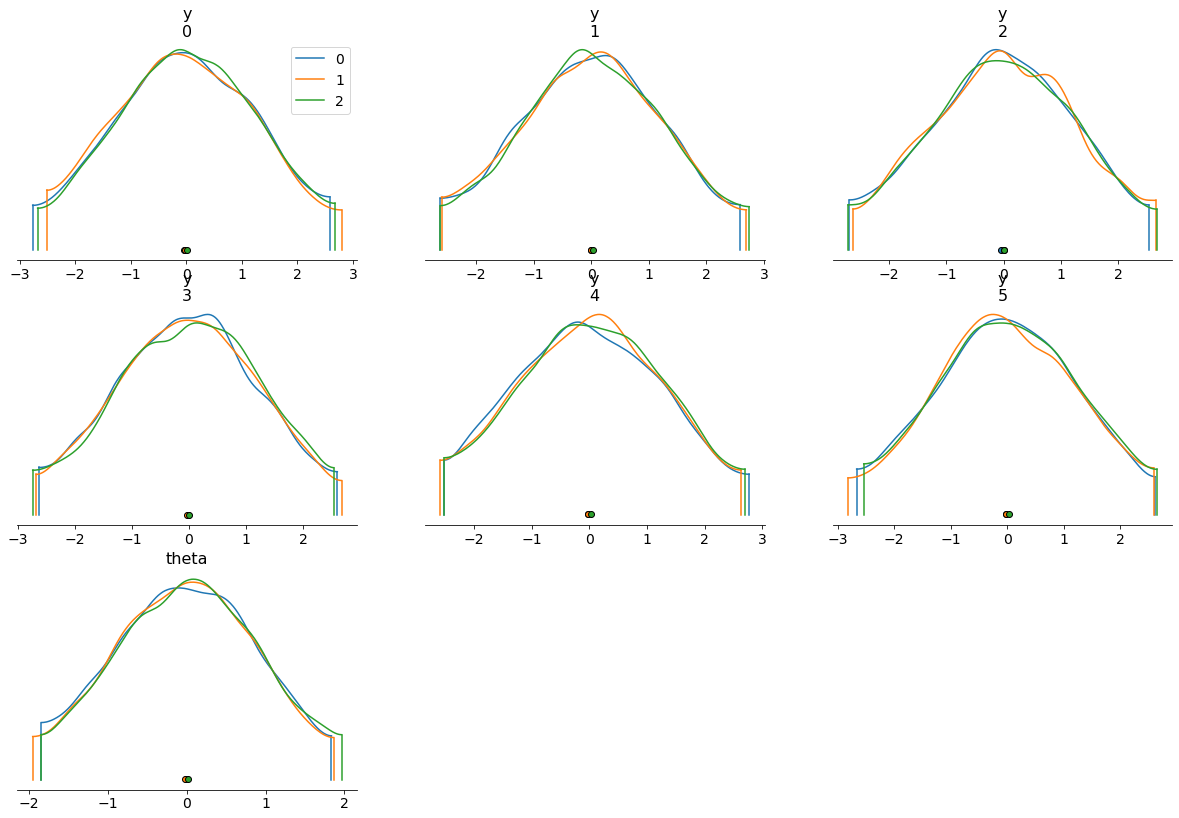

In [25]:
az.plot_density([result_1,result_2,result_3])
plt.show()

### Excercise 6 - Generated quantities post sampling

In [32]:
model_gq = CmdStanModel(stan_file='/root/stan_files/code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


<AxesSubplot:ylabel='Frequency'>

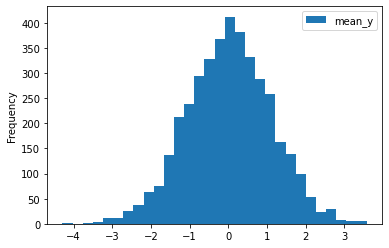

In [35]:
df.plot.hist(bins=30)